In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Utilize os métodos de Euler explícito, Runge-Kutta 2 e Runge-Kutta 4 para resolver a atividade.

In [2]:
def euler_ex(f, a, b, y0, h):
    n = int((b-a)/h)
    y = np.zeros(n+1) #n sub-espaços -> n+1 soluções (vetor para armazenar as soluções)
    y[0] = y0
    for i in range(n):
        xi = a + h*i
        y[i+1] = y[i] + h * f(xi, y[i])
    return y

In [3]:
def rk2(f, a, b, y0, h):
    n = int((b-a)/h)
    y = np.zeros(n+1)
    
    y[0] = y0
    
    for i in range(n):
        xi = a + i*h
        k1 = f(xi, y[i])
        k2 = f(xi + h, y[i] + h*k1) #melhorado
        y[i+1] = y[i] + h/2 * (k1 + k2)
        
    return y

In [4]:
def rk4(f, a, b, y0, h):
    n = int((b-a)/h)
    y = np.zeros(n+1)
    
    y[0] = y0
    
    for i in range(n):
        xi = a + i*h
        k1 = f(xi, y[i])
        k2 = f(xi + h/2, y[i] + h/2 * k1)
        k3 = f(xi + h/2, y[i] + h/2 * k2)
        k4 = f(xi + h, y[i] + h * k3)
        y[i+1] = y[i] + h/6 * (k1 + 2*(k2+k3) + k4)
        
    return y

# 1) Use os métodos que aprendemos em aula para resolver os PVIs abaixo (use o valor do h dado).

## a) y' = te^(3t) - 2y, 0<=t<=1, y(0) = 0, h = 0.5

Exata [0.         0.28361652 3.21909932]
Euler [0.         0.         1.12042227]
RK2 [0.         0.56021113 5.3014898 ]
RK4 [0.         0.29699746 3.31431178]


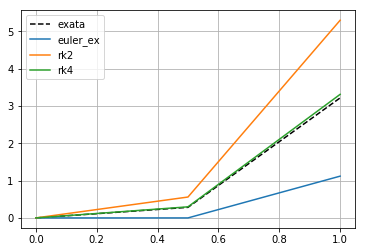

In [5]:
f = lambda t, y: t*np.exp(3*t) - 2*y
exata = lambda t: 1/5*(t*np.exp(3*t)) - 1/25*(np.exp(3*t)) + 1/25*(np.exp(-2*t))
a = 0
b = 1
y0 = 0
h = 0.5
euler = euler_ex(f, a, b, y0, h)
y2 = rk2(f, a, b, y0, h)
y4 = rk4(f, a, b, y0, h)

t = np.linspace(a, b, int((b-a)/h) + 1)
plt.plot(t, exata(t), 'k--')
plt.plot(t, euler)
plt.plot(t, y2)
plt.plot(t, y4)
plt.legend(['exata', 'euler_ex', 'rk2', 'rk4'])
plt.grid()

print(f'Exata {exata(t)}\nEuler {euler}\nRK2 {y2}\nRK4 {y4}')

In [6]:
#Para esse caso, o método de Runge-Kutta de ordem 4 é o que melhor se aproxima do valor exato.

## b) y' = 1 + (t - y)², 2<=t<=3, y(2) = 1, h = 0.5

Exata [1.         1.83333333 2.5       ]
Euler [1.    2.    2.625]
RK2 [1.         1.8125     2.48155308]
RK4 [1.         1.83332336 2.49997119]


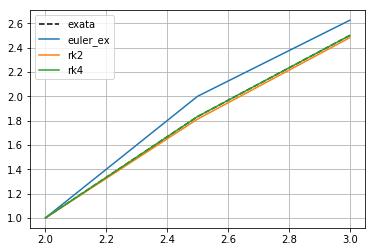

In [7]:
f = lambda t, y: 1 + (t - y)**2
exata = lambda t: t + 1/(1 - t)
a = 2
b = 3
y0 = 1
h = 0.5
euler = euler_ex(f, a, b, y0, h)
y2 = rk2(f, a, b, y0, h)
y4 = rk4(f, a, b, y0, h)

t = np.linspace(a, b, int((b-a)/h) + 1)
plt.plot(t, exata(t), 'k--')
plt.plot(t, euler)
plt.plot(t, y2)
plt.plot(t, y4)
plt.legend(['exata', 'euler_ex', 'rk2', 'rk4'])
plt.grid()

print(f'Exata {exata(t)}\nEuler {euler}\nRK2 {y2}\nRK4 {y4}')

In [8]:
#Para esse caso, o método de Runge-Kutta de ordem 2 e 4 é o que melhor se aproxima do valor exato.

## c) y' = 1 + y/t, 1<=t<=2, y(1) = 2, h = 0.25 

Exata [2.         2.77892944 3.60819766 4.47932763 5.38629436]
Euler [2.         2.75       3.55       4.39166667 5.26904762]
RK2 [2.         2.775      3.60083333 4.46882937 5.37285856]
RK4 [2.         2.77890947 3.60816473 4.4792846  5.38624259]


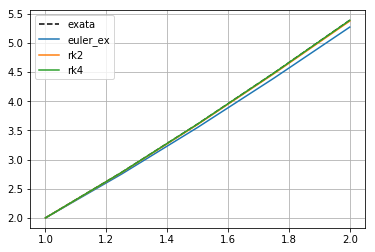

In [9]:
f = lambda t, y: 1 + y/t
exata = lambda t: t*np.log(t) + 2*t
a = 1
b = 2
y0 = 2
h = 0.25
euler = euler_ex(f, a, b, y0, h)
y2 = rk2(f, a, b, y0, h)
y4 = rk4(f, a, b, y0, h)

t = np.linspace(a, b, int((b-a)/h) + 1)
plt.plot(t, exata(t), 'k--')
plt.plot(t, euler)
plt.plot(t, y2)
plt.plot(t, y4)
plt.legend(['exata', 'euler_ex', 'rk2', 'rk4'])
plt.grid()

print(f'Exata {exata(t)}\nEuler {euler}\nRK2 {y2}\nRK4 {y4}')

In [10]:
#Para esse caso, o método de Runge-Kutta de ordem 2 e 4 é o que melhor se aproxima do valor exato.

## d) y' = cos(2t) + sin(3t), 0<=t<=1, y(0) = 1, h = 0.25

Exata [1.         1.32914981 1.73048976 2.04147203 2.11797955]
Euler [1.         1.25       1.63980533 2.02425465 2.23645725]
RK2 [1.         1.31990267 1.70702999 2.00535595 2.0770789 ]
RK4 [1.         1.32916505 1.73053357 2.04154358 2.1180636 ]


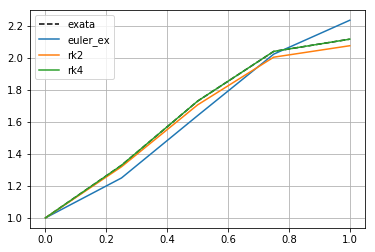

In [11]:
f = lambda t, y: np.cos(2*t) + np.sin(3*t)
exata = lambda t: 1/2*(np.sin(2*t)) - 1/3*(np.cos(3*t)) + 4/3
a = 0
b = 1
y0 = 1
h = 0.25
euler = euler_ex(f, a, b, y0, h)
y2 = rk2(f, a, b, y0, h)
y4 = rk4(f, a, b, y0, h)

t = np.linspace(a, b, int((b-a)/h) + 1)
plt.plot(t, exata(t), 'k--')
plt.plot(t, euler)
plt.plot(t, y2)
plt.plot(t, y4)
plt.legend(['exata', 'euler_ex', 'rk2', 'rk4'])
plt.grid()

print(f'Exata {exata(t)}\nEuler {euler}\nRK2 {y2}\nRK4 {y4}')

In [12]:
#Para esse caso, o método de Runge-Kutta de ordem 4 é o que melhor se aproxima do valor exato.

# 2) Agora, verifique que as soluções exatas abaixo satisfazem as equações do exercício anterior (de acordo com a letra a), b), etc). 

In [13]:
#Fiz a verificação no papel.
#Além disso, no exercício anterior, plotei a função exata para comparar os resultados obtidos.

# 3) Faça um estudo do erro, ou seja, compare sua solução numérica com a exata, para cada item.

In [14]:
#Além dos resultados abaixo, tabelei no papel os resultados obtidos por cada método e os erros de cada um.

## a) y' = te^(3t) - 2y, 0<=t<=1, y(0) = 0, h = 0.5 

Erro-Euler [0.         0.28361652 2.09867705]
Erro-RK2 [0.         0.27659461 2.08239048]
Erro-RK4 [0.         0.01338094 0.09521246]


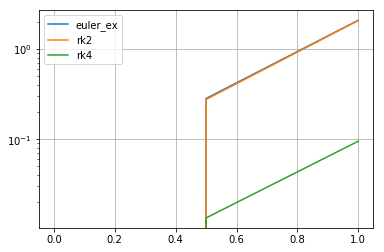

In [15]:
f = lambda t, y: t*np.exp(3*t) - 2*y
exata = lambda t: 1/5*(t*np.exp(3*t)) - 1/25*(np.exp(3*t)) + 1/25*(np.exp(-2*t))
a = 0
b = 1
y0 = 0
h = 0.5
euler = euler_ex(f, a, b, y0, h)
y2 = rk2(f, a, b, y0, h)
y4 = rk4(f, a, b, y0, h)

t = np.linspace(a, b, int((b-a)/h) + 1)
y = exata(t)

ereu = np.abs(y-euler)
erk2 = np.abs(y-y2)
erk4 = np.abs(y-y4)

plt.plot(t, ereu)
plt.plot(t, erk2)
plt.plot(t, erk4)

plt.legend(['euler_ex', 'rk2', 'rk4'])
plt.yscale('log')
plt.grid()

print(f'Erro-Euler {ereu}\nErro-RK2 {erk2}\nErro-RK4 {erk4}')

## b) y' = 1 + (t - y)², 2<=t<=3, y(2) = 1, h = 0.5

Erro-Euler [0.         0.16666667 0.125     ]
Erro-RK2 [0.         0.02083333 0.01844692]
Erro-RK4 [0.00000000e+00 9.97260213e-06 2.88065738e-05]


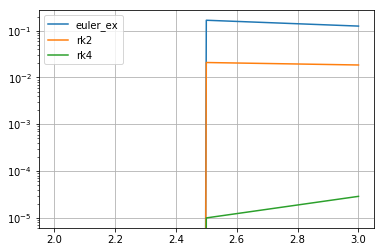

In [16]:
f = lambda t, y: 1 + (t - y)**2
exata = lambda t: t + 1/(1 - t)
a = 2
b = 3
y0 = 1
h = 0.5
euler = euler_ex(f, a, b, y0, h)
y2 = rk2(f, a, b, y0, h)
y4 = rk4(f, a, b, y0, h)

t = np.linspace(a, b, int((b-a)/h) + 1)
y = exata(t)

ereu = np.abs(y-euler)
erk2 = np.abs(y-y2)
erk4 = np.abs(y-y4)

plt.plot(t, ereu)
plt.plot(t, erk2)
plt.plot(t, erk4)

plt.legend(['euler_ex', 'rk2', 'rk4'])
plt.yscale('log')
plt.grid()

print(f'Erro-Euler {ereu}\nErro-RK2 {erk2}\nErro-RK4 {erk4}')

## c) y' = 1 + y/t, 1<=t<=2, y(1) = 2, h = 0.25 

Erro-Euler [0.         0.02892944 0.05819766 0.08766096 0.11724674]
Erro-RK2 [0.         0.00392944 0.00736433 0.01049826 0.0134358 ]
Erro-RK4 [0.00000000e+00 1.99741222e-05 3.29340733e-05 4.30257164e-05
 5.17723112e-05]


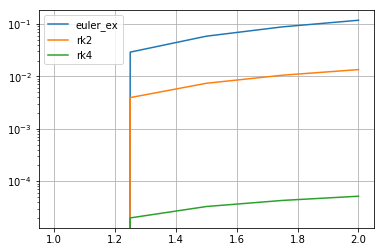

In [17]:
f = lambda t, y: 1 + y/t
exata = lambda t: t*np.log(t) + 2*t
a = 1
b = 2
y0 = 2
h = 0.25
euler = euler_ex(f, a, b, y0, h)
y2 = rk2(f, a, b, y0, h)
y4 = rk4(f, a, b, y0, h)

t = np.linspace(a, b, int((b-a)/h) + 1)
y = exata(t)

ereu = np.abs(y-euler)
erk2 = np.abs(y-y2)
erk4 = np.abs(y-y4)

plt.plot(t, ereu)
plt.plot(t, erk2)
plt.plot(t, erk4)

plt.legend(['euler_ex', 'rk2', 'rk4'])
plt.yscale('log')
plt.grid()

print(f'Erro-Euler {ereu}\nErro-RK2 {erk2}\nErro-RK4 {erk4}')

## d) y' = cos(2t) + sin(3t), 0<=t<=1, y(0) = 1, h = 0.25

Erro-Euler [0.         0.07914981 0.09068443 0.01721738 0.11847771]
Erro-RK2 [0.         0.00924715 0.02345977 0.03611608 0.04090065]
Erro-RK4 [0.00000000e+00 1.52338684e-05 4.38077927e-05 7.15432248e-05
 8.40544010e-05]


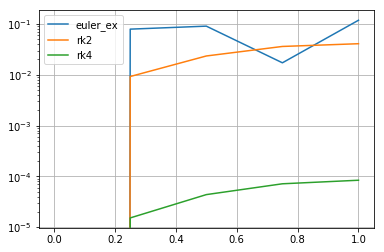

In [18]:
f = lambda t, y: np.cos(2*t) + np.sin(3*t)
exata = lambda t: 1/2*(np.sin(2*t)) - 1/3*(np.cos(3*t)) + 4/3
a = 0
b = 1
y0 = 1
h = 0.25
euler = euler_ex(f, a, b, y0, h)
y2 = rk2(f, a, b, y0, h)
y4 = rk4(f, a, b, y0, h)

t = np.linspace(a, b, int((b-a)/h) + 1)
y = exata(t)

ereu = np.abs(y-euler)
erk2 = np.abs(y-y2)
erk4 = np.abs(y-y4)

plt.plot(t, ereu)
plt.plot(t, erk2)
plt.plot(t, erk4)

plt.legend(['euler_ex', 'rk2', 'rk4'])
plt.yscale('log')
plt.grid()

print(f'Erro-Euler {ereu}\nErro-RK2 {erk2}\nErro-RK4 {erk4}')

In [19]:
#Todos os erros partem do zero pois o ponto inicial é conhecido.
#Vemos que, para todos os itens, o método de Runge-Kutta de ordem 4 é o que possui menor erro.

### Observações finais:
#### O método de Euler é um método de ordem h, o método de RK2 (Euler melhorado) é um método de ordem h². Ou seja, RK2 é um método de ordem superior ao método de Euler. Na prática, a ordem é fundamental, pois vemos que quando o h é reduzido o erro diminui mais rapido para métodos de ordem elevada. Então, ao comparar o erro de Euler com o erro de RK2 (Euler melhorado), vemos que para esse último, o erro é menor, ou seja, ele é mais acurado.
#### Quando o valor de h é reduzido, se o erro diminui o método numérico é convergente.
#### Para o mesmo h, o método de Euler não tem uma precisão tão boa quanto RK2 e RK4. No contexto de estabilidade, a região de estabilidade do método de Euler é uma circunferência, e a de RK2 é uma elipse (maior no heixo dos imaginários). Como a região de estabilidade do RK4 é maior no eixo dos reais, ele permite usar outros valores de h, diferentemente do Euler que o h é mais restrito. Dessa forma, RK4 tem uma região de estabilidade maior que o método de Euler. O h do RK4 pode ser maior que o h do Euler. RK4 é mais estável que Euler.